In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

## Lectura de datos

In [5]:
data = pd.read_csv("../data/processed_data.csv")

features = data[["prec", "tmin", "tmax", "racha", "hrMax", "hrMin"]]

features.head()

,prec,tmin,tmax,racha,hrMax,hrMin
0,0.0,7.9,17.5,13.6,54.0,26.0
1,0.0,9.8,19.6,14.4,69.0,40.0
2,0.0,9.7,22.2,15.3,76.0,44.0
3,0.0,14.5,22.0,16.1,66.0,43.0
4,0.0,5.2,18.0,15.8,84.0,40.0


## Modelo

In [6]:
# Parametros

n_estimators = 100 
contamination = 0.01
sample_size = 256
random_state = 42

# Entrenamiento del modelo

modelo = IsolationForest(n_estimators=n_estimators, 
                         contamination=contamination, 
                         max_samples=sample_size, 
                         random_state=random_state)
modelo.fit(features)

IsolationForest(contamination=0.01, max_samples=256, random_state=42)

In [7]:
data = data.loc[features.index].copy() 
data['anomaly_score'] = modelo.decision_function(features)
data['anomaly'] = modelo.predict(features)

data['anomaly'].value_counts()

anomaly
 1    1804
-1      19
Name: count, dtype: int64

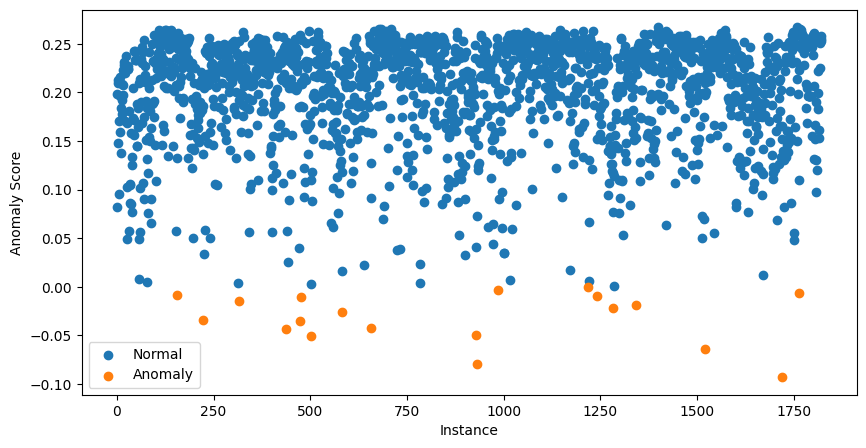

In [8]:
# Visualization of the results
plt.figure(figsize=(10, 5))

# Plot normal instances
normal = data[data['anomaly'] == 1]
plt.scatter(normal.index, normal['anomaly_score'], label='Normal')

# Plot anomalies
anomalies = data[data['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['anomaly_score'], label='Anomaly')
plt.xlabel("Instance")
plt.ylabel("Anomaly Score")
plt.legend()
plt.show()